In [8]:
%run ./utils.ipynb

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
csv_path = "Agregados_por_setores_cor_ou_raca_BR_csv/Agregados_por_setores_cor_ou_raca_BR.csv"

In [11]:
estado = 'RS'
#municipio = '4314902'
municipio = '4314100' # Passo Fundo
dummy_dinamico = False

shp_path = f"{estado}_setores_CD2022/{estado}_setores_CD2022.shp"
merged_df = process_mun(shp_path, csv_path, municipio)
all_segs_poa = calculate_seg(merged_df)

Dissimilarity: 0.36938877371482537
Spatial Dissimilarity: 0.2862184030564052
Gini: 0.48854095748836385
Entropy: 0.12980799191107342
Isolation: 0.36469467525756316
Dist. Decay Isolation: 0.32391461781522224
Rel. Concentration: -0.10650809891200008
Rel. Centralization: -0.10156531362133592
Rel. Clustering: 0.5956711862979596


In [12]:
#help(inference.TwoValueTest)

In [33]:
n_iteracoes = 5
n_jobs = -1
backend = "multiprocessing"

poa_sys_0 = inference.SingleValueTest(all_segs_poa[0], null_approach='systematic', iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
poa_sys_1 = inference.SingleValueTest(all_segs_poa[1], null_approach='systematic', iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
poa_sys_2 = inference.SingleValueTest(all_segs_poa[2], null_approach='systematic', iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
poa_sys_3 = inference.SingleValueTest(all_segs_poa[3], null_approach='systematic', iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
poa_sys_4 = inference.SingleValueTest(all_segs_poa[4], null_approach='systematic', iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
poa_sys_5 = inference.SingleValueTest(all_segs_poa[5], null_approach='systematic', iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
poa_sys_6 = inference.SingleValueTest(all_segs_poa[6], null_approach='systematic', iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
poa_sys_7 = inference.SingleValueTest(all_segs_poa[7], null_approach='systematic', iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
poa_sys_8 = inference.SingleValueTest(all_segs_poa[8], null_approach='systematic', iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

<Axes: title={'center': 'Dissim (Value = 0.369)'}, ylabel='Count'>

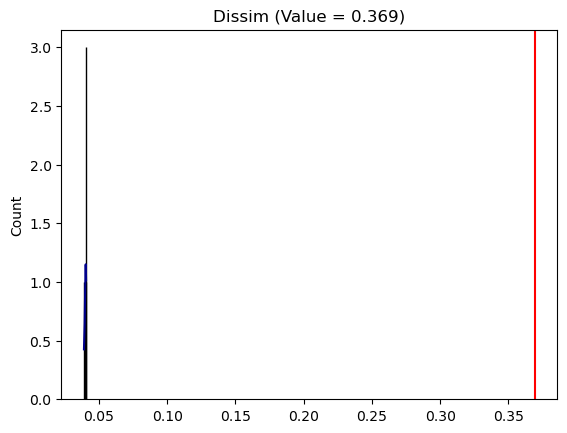

In [22]:
poa_sys_0.plot()

<Axes: title={'center': 'Dissim (Value = 0.369)'}, ylabel='Count'>

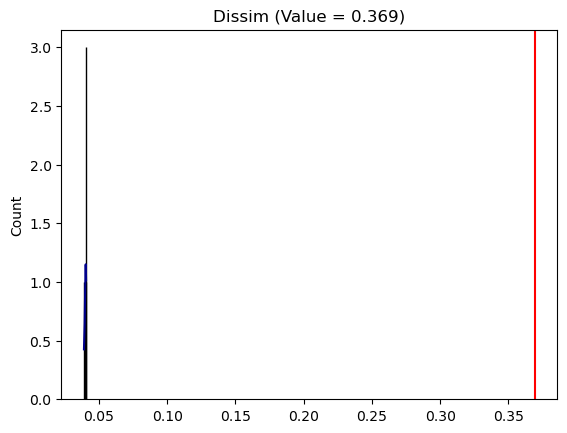

In [28]:
poa_sys_0.plot()

In [27]:
print(a)

Axes(0.125,0.11;0.775x0.77)


<Axes: title={'center': 'Dissim (Value = 0.369)'}, ylabel='Count'>

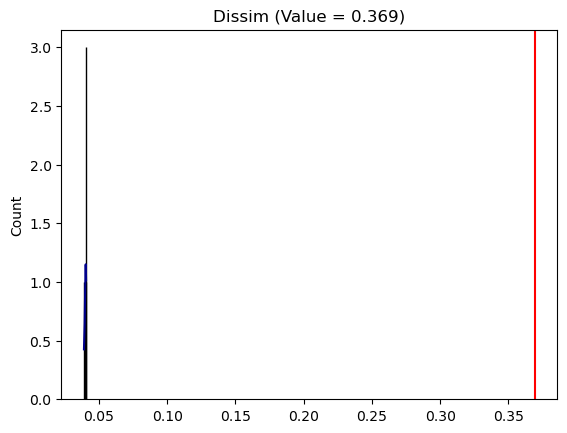

In [30]:
poa_sys_0.plot(ax=None)

<Axes: title={'center': 'SpatialDissim (Value = 0.286)'}, ylabel='Count'>

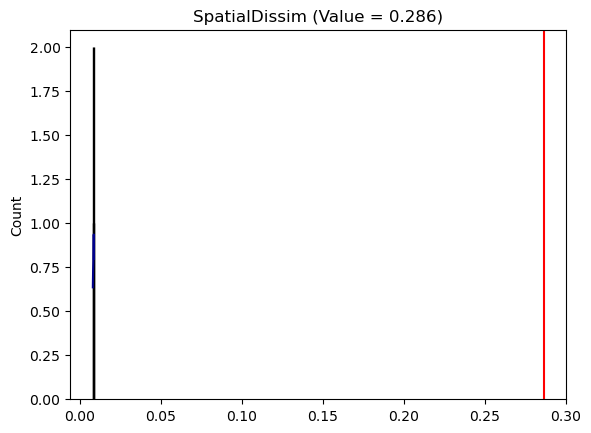

In [31]:
poa_sys_1.plot(ax=None)

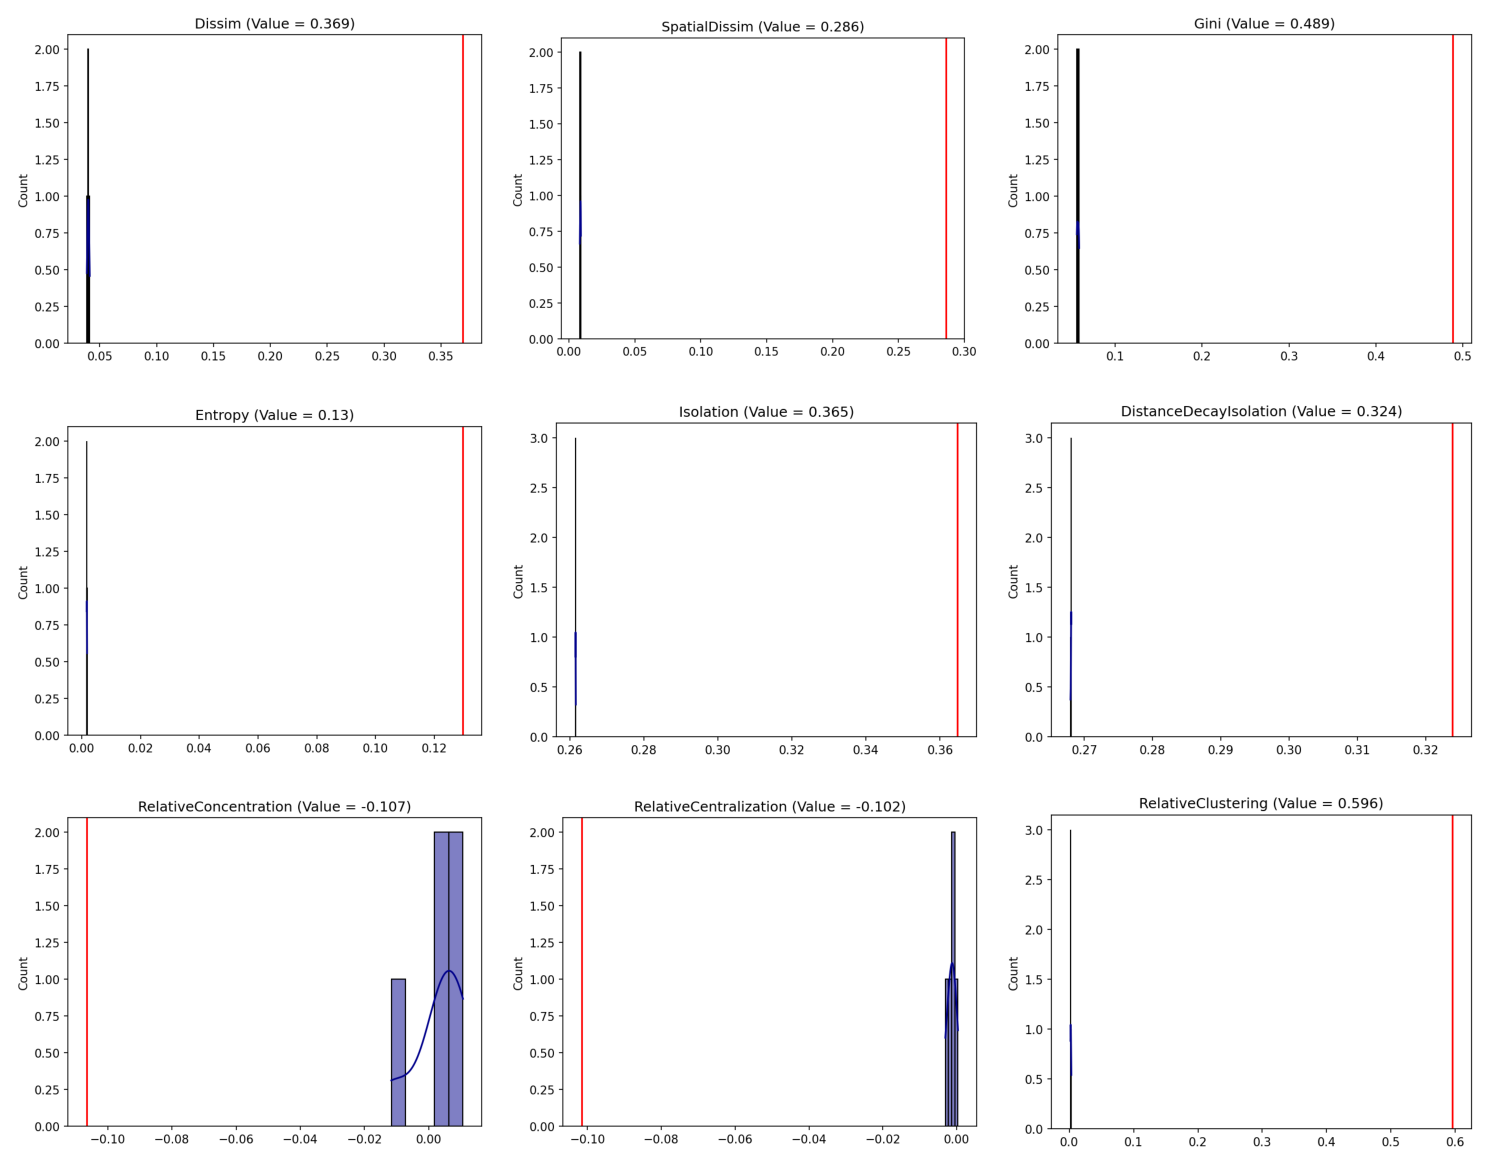

In [36]:
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

tests = [
    poa_sys_0, poa_sys_1, poa_sys_2,
    poa_sys_3, poa_sys_4, poa_sys_5,
    poa_sys_6, poa_sys_7, poa_sys_8
]

images = []

# Create plots and store them in memory
for test in tests:
    buffer = BytesIO()

    test.plot()                          # PySAL creates its own figure
    plt.savefig(buffer, format="png", bbox_inches="tight", dpi=150)
    plt.close()

    buffer.seek(0)
    images.append(Image.open(buffer))

# Render grid
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
axs = axs.flatten()

for ax, img in zip(axs, images):
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()


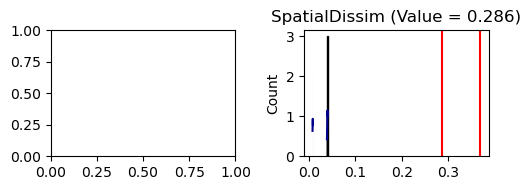

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2))
ax1, ax2 = axs.ravel()

poa_sys_0.plot(ax=None)
poa_sys_1.plot(ax=None)

plt.tight_layout()
plt.show()

In [10]:
import matplotlib.pyplot as plt
from segregation.inference import SingleValueTest

def patched_plot(self, ax=None, bins=15, **kwargs):
    """
    Replacement plot method for SingleValueTest
    that properly respects ax=
    """
    if ax is None:
        ax = plt.gca()

    # Plot null distribution
    ax.hist(self.est_sim, bins=bins, alpha=0.7)

    # Plot observed statistic
    ax.axvline(self.statistic, linewidth=2)

    return ax

# Apply monkey patch
SingleValueTest.plot = patched_plot

In [12]:
poa_sys_0.est_sim

array([0.04008491, 0.03820625, 0.03980342, 0.04022024, 0.03936743])

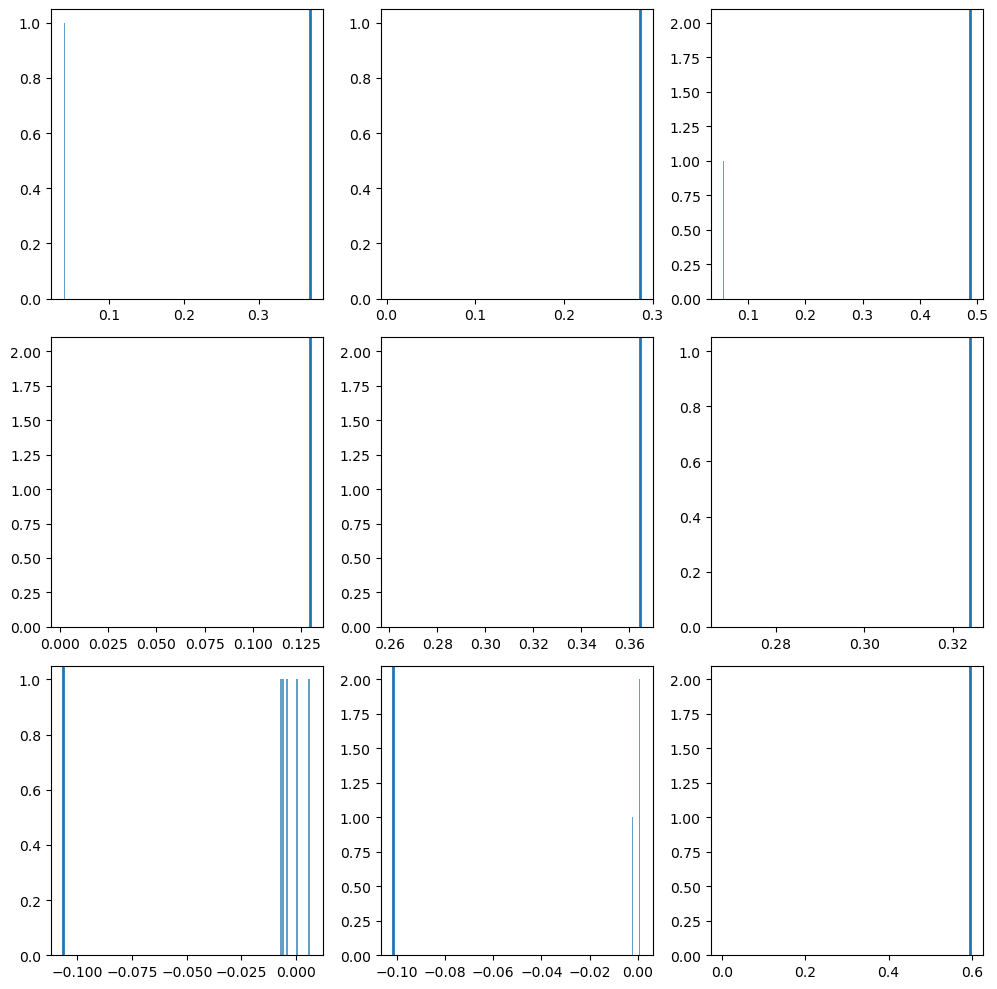

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()

poa_sys_0.plot(ax=axs[0])
poa_sys_1.plot(ax=axs[1])
poa_sys_2.plot(ax=axs[2])
poa_sys_3.plot(ax=axs[3])
poa_sys_4.plot(ax=axs[4])
poa_sys_5.plot(ax=axs[5])
poa_sys_6.plot(ax=axs[6])
poa_sys_7.plot(ax=axs[7])
poa_sys_8.plot(ax=axs[8])

plt.tight_layout()
plt.show()


In [ ]:
import inspect
print(inspect.signature(poa_sys_0.plot))

In [ ]:
poa_sys_0.plot()

In [ ]:
poa_sys_1.plot()

In [ ]:
print(id(poa_sys_0))
print(id(poa_sys_1))
print(id(poa_sys_2))

In [ ]:
plt.close('all')
plt.rcdefaults()

fig, axs = plt.subplots(3, 3, figsize=(15, 12)) # Largura Altura

# Flatten axes (no row/col indexing, no loops)
axs = axs.flatten()   # Important: ensure 1D array

poa_sys_0.plot()
poa_sys_1.plot()
poa_sys_2.plot()
poa_sys_3.plot()
poa_sys_4.plot()
poa_sys_5.plot()
poa_sys_6.plot()
poa_sys_7.plot()
poa_sys_8.plot()

print(axs)

plt.tight_layout()
plt.show()

In [ ]:
plt.close('all')
plt.rcdefaults()

fig, axs = plt.subplots(3, 3, figsize=(25, 25)) # Largura Altura

# Flatten axes (no row/col indexing, no loops)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axs.ravel()

poa_sys_0.plot(ax=ax1)
poa_sys_1.plot(ax=ax2)
poa_sys_2.plot(ax=ax3)
poa_sys_3.plot(ax=ax4)
poa_sys_4.plot(ax=ax5)
poa_sys_5.plot(ax=ax6)
poa_sys_6.plot(ax=ax7)
poa_sys_7.plot(ax=ax8)
poa_sys_8.plot(ax=ax9)

plt.tight_layout()
plt.show()